# Machine Learning Final: Kush Gulati

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn import utils
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error, r2_score
import statistics
from statistics import mean
from statistics import stdev
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from statistics import mean
from yellowbrick.regressor import AlphaSelection
from sklearn import linear_model

## Loading in Dataset & Describing It

In [2]:
dataset = "/Users/kushgulati/Desktop/Memorable-Code/ML Projects/ML FINAL/class_final_ml.csv"
data = pd.read_csv(dataset)
pd.set_option('display.max_columns', 100)
data.head(5)

,party,seats,sq_cabinet,sq_pm,election_year,banzhaf,shapley,splus,country,cabinet_name,caretaker,cabinet_party,prime_minister,left_rightx,left_righty,cabinet_seats,total_cabinet_size,party_name_english,country_id,election_id,seats_share,enpp,mingov,bicameral,miw_proportion,cabinet_proportion,seats_proportion,country_dummy1,country_dummy2,country_dummy3,country_dummy4,country_dummy5,country_dummy6,country_dummy7,country_dummy8,country_dummy9,country_dummy10,country_dummy11,country_dummy12,country_dummy13
0,PCP,15,0,0.0,1999,0.027778,0.033333,0.054766,PRT,Guterres II,0,0,0,2.922222,NaN,0,23,Portuguese Communist Party,63,352,6.521739,2.61312,1,0,0.1,0.0,0.065217,0,0,0,0,0,0,0,0,0,0,0,1,0
1,PS,115,1,1.0,1999,0.861111,0.833333,0.791459,PRT,Guterres II,0,1,1,4.052778,NaN,17,23,Socialist Party,63,352,50.000000,2.61312,1,0,0.5,1.0,0.500000,0,0,0,0,0,0,0,0,0,0,0,1,0
2,CDS-PP,15,0,0.0,1999,0.027778,0.033333,0.054766,PRT,Guterres II,0,0,0,7.935000,NaN,0,23,People's Party,63,352,6.521739,2.61312,1,0,0.1,0.0,0.065217,0,0,0,0,0,0,0,0,0,0,0,1,0
3,PEV,2,0,0.0,1999,0.027778,0.033333,0.021691,PRT,Guterres II,0,0,0,2.171053,NaN,0,23,Ecology Party -- Greens,63,352,0.869565,2.61312,1,0,0.1,0.0,0.008696,0,0,0,0,0,0,0,0,0,0,0,1,0
4,BE,2,0,0.0,1999,0.027778,0.033333,0.022551,PRT,Guterres II,0,0,0,1.950000,NaN,0,23,Bloc of the Left,63,352,0.869565,2.61312,1,0,0.1,0.0,0.008696,0,0,0,0,0,0,0,0,0,0,0,1,0


In [3]:
data.shape

(657, 40)

In [4]:
vals = "party,seats,sq_cabinet,sq_pm,election_year,banzhaf,shapley,splus,country,cabinet_name,caretaker,cabinet_party,prime_minister,left_rightx,left_righty,cabinet_seats,total_cabinet_size,party_name_english,country_id,election_id,seats_share,enpp,mingov,bicameral,miw_proportion,cabinet_proportion,seats_proportion,country_dummy1,country_dummy2,country_dummy3,country_dummy4,country_dummy5,country_dummy6,country_dummy7,country_dummy8,country_dummy9,country_dummy10,country_dummy11,country_dummy12,country_dummy13"
vals = vals.split(",")
len(vals)

40

In [5]:
data.describe()

,seats,sq_pm,election_year,banzhaf,shapley,splus,caretaker,cabinet_party,prime_minister,left_rightx,left_righty,cabinet_seats,total_cabinet_size,country_id,election_id,seats_share,enpp,mingov,bicameral,miw_proportion,cabinet_proportion,seats_proportion,country_dummy1,country_dummy2,country_dummy3,country_dummy4,country_dummy5,country_dummy6,country_dummy7,country_dummy8,country_dummy9,country_dummy10,country_dummy11,country_dummy12,country_dummy13
count,657.000000,644.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,605.000000,368.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,32.100457,0.128882,1998.307458,0.129328,0.129337,0.129289,0.060883,0.350076,0.127854,5.052198,5.323913,2.304414,19.003044,37.490107,347.062405,12.813260,4.915088,0.324201,0.544901,0.129376,0.129376,0.129376,0.047184,0.120244,0.050228,0.085236,0.091324,0.080670,0.057839,0.141553,0.044140,0.105023,0.068493,0.033486,0.074581
std,46.440287,0.335330,7.288470,0.144730,0.140964,0.140634,0.239297,0.477357,0.334181,2.305746,2.226965,4.174019,4.828143,21.729987,207.763066,12.112704,1.587204,0.468432,0.498359,0.108112,0.226728,0.123545,0.212194,0.325494,0.218582,0.279445,0.288289,0.272535,0.233616,0.348856,0.205563,0.306816,0.252783,0.180038,0.262915
min,1.000000,0.000000,1986.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667,0.500000,0.000000,10.000000,7.000000,2.000000,0.158730,2.557285,0.000000,0.000000,0.000000,0.000000,0.001587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,1992.000000,0.027027,0.027778,0.029893,0.000000,0.000000,0.000000,3.158889,3.300000,0.000000,15.000000,21.000000,156.000000,3.500000,3.712816,0.000000,0.000000,0.046326,0.000000,0.035176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,1998.000000,0.076923,0.073449,0.074756,0.000000,0.000000,0.000000,5.581111,5.800000,0.000000,19.000000,35.000000,365.000000,8.022922,4.733491,0.000000,1.000000,0.100000,0.000000,0.080402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,0.000000,2005.000000,0.166667,0.166667,0.172758,0.000000,1.000000,0.000000,6.944444,6.800000,4.000000,21.000000,59.000000,530.000000,19.333334,5.544385,1.000000,1.000000,0.200000,0.190476,0.193333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,319.000000,1.000000,2011.000000,0.861111,0.833333,0.791459,1.000000,1.000000,1.000000,9.888889,9.800000,25.000000,31.000000,67.000000,700.000000,50.000000,9.050684,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Removing Variables Based on Theory

In [6]:
#PANDAS PROFILING

# hold out random portion for test
#msk = np.random.rand(len(data)) < 0.8
#train = data[msk]
#test = data[~msk]
 
#%%
# take a look at the data
#profile = train.profile_report()
#profile.to_file(output_file='report.html')

In [7]:
# Delete columns from the dataframe
vals.remove("party")
vals.remove("country")
vals.remove("cabinet_name")
vals.remove("party_name_english")
vals.remove("election_year")
vals.remove("country_id")
vals.remove("election_id")
vals.remove("left_righty")
vals.remove("country_dummy1")
vals.remove("country_dummy2")
vals.remove("country_dummy3")
vals.remove("country_dummy4")
vals.remove("country_dummy5")
vals.remove("country_dummy6")
vals.remove("country_dummy7")
vals.remove("country_dummy8")
vals.remove("country_dummy9")
vals.remove("country_dummy10")
vals.remove("country_dummy11")
vals.remove("country_dummy12")
vals.remove("country_dummy13")
vals.remove("caretaker")

In [8]:
drops =[]
drops.extend(("party","country","cabinet_name","party_name_english","election_year","country_id","election_id","left_righty","country_dummy1","country_dummy2","country_dummy3","country_dummy4","country_dummy5","country_dummy6","country_dummy7","country_dummy8","country_dummy9","country_dummy10","country_dummy11","country_dummy12","country_dummy13", "caretaker"))
print("Dropped " + str(len(drops)) + " variables from the set.")

Dropped 22 variables from the set.


## Visualization After Manual Feature Selection

,cabinet_proportion,Value
0,mean,0.13
1,median,0.00


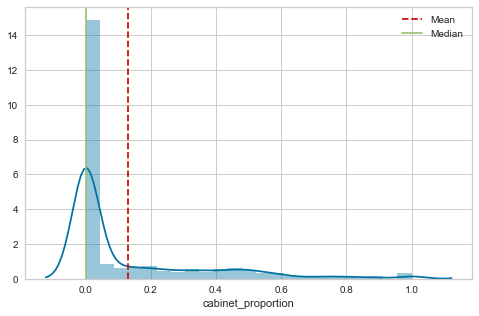

In [9]:
#Plot creation
plt.figure(figsize=(8,5))
plt.tight_layout()
seabornInstance.distplot(data['cabinet_proportion'])
mean=data['cabinet_proportion'].mean()
median=data['cabinet_proportion'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'cabinet_proportion': ['mean', 'median'], 'Value': [mean, median]})
pd.set_option('display.float_format', '{:.2f}'.format)
display(mmm)

In [10]:
data['cabinet_proportion'].describe()

count   657.00
mean      0.13
std       0.23
min       0.00
25%       0.00
50%       0.00
75%       0.19
max       1.00
Name: cabinet_proportion, dtype: float64

In [11]:
data = data[vals]
data.shape

(657, 18)

In [12]:
data.describe()

,seats,sq_pm,banzhaf,shapley,splus,cabinet_party,prime_minister,left_rightx,cabinet_seats,total_cabinet_size,seats_share,enpp,mingov,bicameral,miw_proportion,cabinet_proportion,seats_proportion
count,657.00,644.00,657.00,657.00,657.00,657.00,657.00,605.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00,657.00
mean,32.10,0.13,0.13,0.13,0.13,0.35,0.13,5.05,2.30,19.00,12.81,4.92,0.32,0.54,0.13,0.13,0.13
std,46.44,0.34,0.14,0.14,0.14,0.48,0.33,2.31,4.17,4.83,12.11,1.59,0.47,0.50,0.11,0.23,0.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.00,10.00,0.16,2.56,0.00,0.00,0.00,0.00,0.00
25%,7.00,0.00,0.03,0.03,0.03,0.00,0.00,3.16,0.00,15.00,3.50,3.71,0.00,0.00,0.05,0.00,0.04
50%,17.00,0.00,0.08,0.07,0.07,0.00,0.00,5.58,0.00,19.00,8.02,4.73,0.00,1.00,0.10,0.00,0.08
75%,39.00,0.00,0.17,0.17,0.17,1.00,0.00,6.94,4.00,21.00,19.33,5.54,1.00,1.00,0.20,0.19,0.19
max,319.00,1.00,0.86,0.83,0.79,1.00,1.00,9.89,25.00,31.00,50.00,9.05,1.00,1.00,0.50,1.00,0.50


## Preprocessing: Handling Missing Values in Data2

In [13]:
data2 = data.dropna()
data2.shape

(599, 18)

In [14]:
#Before Normalization
data2.describe()

,seats,sq_pm,banzhaf,shapley,splus,cabinet_party,prime_minister,left_rightx,cabinet_seats,total_cabinet_size,seats_share,enpp,mingov,bicameral,miw_proportion,cabinet_proportion,seats_proportion
count,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00
mean,34.20,0.14,0.14,0.14,0.14,0.38,0.14,5.04,2.48,18.85,13.74,4.85,0.33,0.52,0.14,0.14,0.14
std,47.66,0.34,0.15,0.14,0.14,0.48,0.34,2.31,4.30,4.65,12.22,1.55,0.47,0.50,0.11,0.23,0.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.00,10.00,0.32,2.56,0.00,0.00,0.00,0.00,0.00
25%,9.00,0.00,0.03,0.03,0.04,0.00,0.00,3.16,0.00,15.50,4.59,3.71,0.00,0.00,0.05,0.00,0.05
50%,18.00,0.00,0.09,0.09,0.09,0.00,0.00,5.58,0.00,19.00,8.94,4.68,0.00,1.00,0.11,0.00,0.09
75%,41.00,0.00,0.17,0.18,0.19,1.00,0.00,6.94,4.00,21.00,20.63,5.48,1.00,1.00,0.20,0.22,0.21
max,319.00,1.00,0.86,0.83,0.79,1.00,1.00,9.89,25.00,31.00,50.00,9.05,1.00,1.00,0.50,1.00,0.50


## Preprocessing: Normalize Values in Data2 

In [15]:
#Remove the target variable from Standardization
vals.remove("cabinet_proportion")
x2 = data2[vals].values
x2 = StandardScaler().fit_transform(x2)
normal = pd.DataFrame(x2)
normal.columns=(vals)

#After Normalization
normal.describe()

,seats,sq_cabinet,sq_pm,banzhaf,shapley,splus,cabinet_party,prime_minister,left_rightx,cabinet_seats,total_cabinet_size,seats_share,enpp,mingov,bicameral,miw_proportion,seats_proportion
count,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.70,-0.72,-0.40,-0.94,-0.97,-0.97,-0.78,-0.40,-2.02,-0.58,-1.90,-1.10,-1.48,-0.69,-1.05,-1.27,-1.09
25%,-0.53,-0.72,-0.40,-0.73,-0.74,-0.72,-0.78,-0.40,-0.82,-0.58,-0.72,-0.75,-0.73,-0.69,-1.05,-0.77,-0.75
50%,-0.34,-0.72,-0.40,-0.35,-0.36,-0.36,-0.78,-0.40,0.23,-0.58,0.03,-0.39,-0.11,-0.69,0.96,-0.25,-0.38
75%,0.14,1.38,-0.40,0.22,0.31,0.37,1.29,-0.40,0.82,0.35,0.46,0.56,0.41,1.44,0.96,0.57,0.54
max,5.98,1.38,2.51,4.90,4.84,4.57,1.29,2.51,2.10,5.25,2.61,2.97,2.72,1.44,0.96,3.34,2.90


## Running PCA: Explained Variance 

In [16]:
n_components=5
#Runs the PCA with n_components: # of components
pca1 = PCA(n_components)
# standardize x2
latent_vars = pca1.fit_transform(x2)

#latent variables, which can be used downstream in models instead of x
np.set_printoptions(threshold=np.inf)
#print(latent_vars)

In [17]:
explained_variance = pd.DataFrame(pca1.explained_variance_ratio_, index=['pca'+str(i+1) for i in range(n_components)])
explained_variance.columns = ['Explained Variance Ratio']
display(explained_variance)
print(pca1.explained_variance_ratio_)
print("Total Variance Explained by " + str(n_components) + " Components: " + str(sum(pca1.explained_variance_ratio_)))

,Explained Variance Ratio
pca1,0.48
pca2,0.10
pca3,0.07
pca4,0.07
pca5,0.06


[0.48179944 0.09547254 0.07358155 0.06671337 0.05786964]
Total Variance Explained by 5 Components: 0.7754365465592223


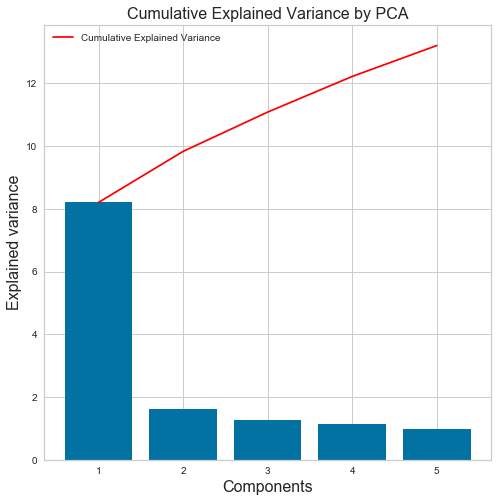

In [18]:
plt.figure(figsize=(8,8))
plt.bar(range(1,len(pca1.explained_variance_ )+1),pca1.explained_variance_ )
plt.title('Cumulative Explained Variance by PCA', fontsize = 16)
plt.ylabel('Explained variance', fontsize = 16)
plt.xlabel('Components', fontsize = 16)
plt.plot(range(1,len(pca1.explained_variance_ )+1),
         np.cumsum(pca1.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

## Running PCA: Storing Latent Variables in Data3 

In [19]:
data3 = pd.DataFrame()
for i in range(1,n_components+1):
    data3['pca'+str(i)] = latent_vars[:,i-1]

In [20]:
print("This dataframe contains each value in the dataset and the PCA latent variables that correspond to it:")
data3.head(10)

This dataframe contains each value in the dataset and the PCA latent variables that correspond to it:


,pca1,pca2,pca3,pca4,pca5
0,-1.87,-1.94,-0.43,1.24,-1.01
1,11.00,-1.25,-0.84,1.63,-0.75
2,-1.79,-1.64,-1.15,1.09,0.80
3,-2.32,-1.93,-0.50,1.09,-1.39
4,-2.32,-1.95,-0.47,1.10,-1.47
5,0.04,-1.98,-0.05,1.97,0.64
6,1.27,-0.26,-2.48,0.79,-0.39
7,-1.79,-0.91,-1.59,-0.09,-0.02
8,-2.20,-0.83,-1.73,-0.18,-0.04
9,-1.89,-0.94,-1.53,-0.10,-0.27


## Running PCA: Checking Components and Data2 Variable Loadings 

In [21]:
print("This dataframe displays how each variable loads onto the PCA component dimensions:")
components = pd.DataFrame(index = vals)
pca_names = list(data3)
for i in range(len(pca1.components_)):
    components[vals[i]] = pca1.components_[i]
components.columns =  pca_names
components.head(20)  

This dataframe displays how each variable loads onto the PCA component dimensions:


,pca1,pca2,pca3,pca4,pca5
seats,0.23,0.08,0.27,0.37,0.02
sq_cabinet,0.16,0.20,-0.23,-0.42,-0.11
sq_pm,0.23,0.04,-0.07,-0.15,0.01
banzhaf,0.33,-0.04,0.05,0.04,0.06
shapley,0.34,-0.05,0.05,0.04,0.06
splus,0.34,-0.04,0.05,0.04,0.06
cabinet_party,0.19,0.29,-0.33,-0.23,-0.32
prime_minister,0.27,0.09,-0.15,0.00,-0.10
left_rightx,0.03,0.14,-0.33,-0.07,0.84
cabinet_seats,0.28,0.16,-0.22,0.06,-0.24


## Running PCA: Heat Map 

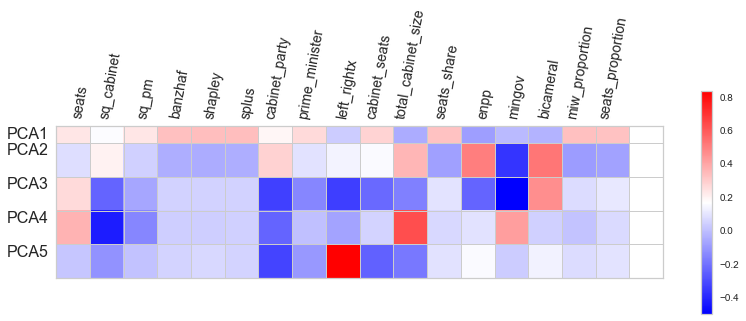

In [22]:
plt.matshow(pca1.components_,cmap='bwr')
plt.yticks([0,.5,1.5,2.5,3.5,4.5],['PCA1','PCA2','PCA3', 'PCA4','PCA5'],fontsize=16,va='top')
plt.colorbar()
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5],vals,rotation=80,fontsize=14,ha='right')
plt.show() 

# Model 1: Elastic Net Using PCA Components

##  Pre-Regression: Splitting the Dataset into Train and Test (80% : 20%)

In [23]:
#splits data into train and test
#predictors
X = data3.values
#target variable
y = data2['cabinet_proportion'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
data3.head()

,pca1,pca2,pca3,pca4,pca5
0,-1.87,-1.94,-0.43,1.24,-1.01
1,11.00,-1.25,-0.84,1.63,-0.75
2,-1.79,-1.64,-1.15,1.09,0.80
3,-2.32,-1.93,-0.50,1.09,-1.39
4,-2.32,-1.95,-0.47,1.10,-1.47


In [25]:
data3.describe()

,pca1,pca2,pca3,pca4,pca5
count,599.00,599.00,599.00,599.00,599.00
mean,0.00,-0.00,0.00,-0.00,0.00
std,2.86,1.28,1.12,1.07,0.99
min,-3.09,-2.67,-3.10,-2.63,-2.50
25%,-2.04,-0.96,-0.72,-0.79,-0.77
50%,-0.99,-0.18,-0.01,0.05,-0.08
75%,1.09,0.81,0.71,0.73,0.68
max,11.00,3.14,3.57,3.30,2.68


## Pre-Regression: Standardize the Independent Variables 

In [26]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
Elastic = ElasticNetCV(l1_ratio=[.01,.1,.2,.4,.5,.7,.9,.93,.99,1],eps=0.001, n_alphas=1000, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=5, copy_X=True, verbose=0, n_jobs=None)
#Elastic = ElasticNet(alpha=0.0001, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Elastic.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 0.93, 0.99, 1],
             max_iter=1000, n_alphas=1000, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

## ElasticNet Regression: Cross-Validation & Coefficients

In [28]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 
print("ElasticNet Coefficients")
y_pred = Elastic.predict(X_test)

pd.set_option('display.float_format', '{:.5f}'.format)
coefs = pd.DataFrame({'Variables': pca_names , 'Coefficients': Elastic.coef_})
display(coefs)

print("Intercept: " + str(Elastic.intercept_))

ElasticNet Coefficients


,Variables,Coefficients
0,pca1,0.20166
1,pca2,0.03400
2,pca3,-0.05250
3,pca4,-0.00720
4,pca5,-0.04825


Intercept: 0.14556119116910232


## ElasticNet Regression: Residuals

In [29]:
print("ElasticNet Residuals:")
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
with pd.option_context("display.max_rows", 100):
    display(dfElastic)

ElasticNet Residuals:


,Actual,Predicted
0,0.57143,0.27092
1,0.00000,0.01601
2,0.00000,0.01251
3,0.00000,-0.04723
4,0.00000,0.12608
...,...,...
115,0.26316,0.16511
116,0.72727,0.59311
117,0.06667,0.14288
118,0.00000,0.15433


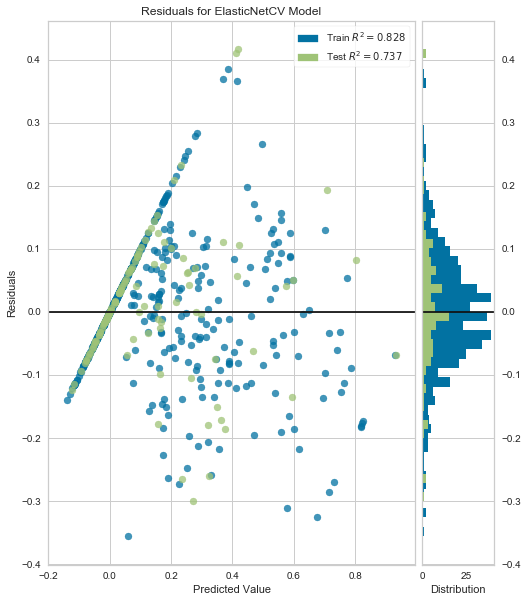

In [30]:
plt.figure(figsize=(8,10))
ResidPlot = ResidualsPlot(Elastic)
ResidPlot.fit(X_train, y_train)  # Fit the training data to the visualizer
ResidPlot.score(X_test, y_test)  # Evaluate the model on the test data
ResidPlot.show() 

## ElasticNet Regression: Scores 

In [31]:
scores = pd.DataFrame([r2_score(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))], index=['R2 Score', 'Mean Squared Error', 'Root Mean Squared Error'])
scores.rename({0:'Scores'}, axis='columns')

,Scores
R2 Score,0.73653
Mean Squared Error,0.01086
Root Mean Squared Error,0.10423


# Model 2: Elastic Net Using Manual Feature Selection Vars

##  Pre-Regression: Splitting the Dataset into Train and Test (80% : 20%)

In [32]:
#splits data into train and test
#predictors
X = data2[vals].values
#target variable
y = data2['cabinet_proportion'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
data2.describe()

,seats,sq_pm,banzhaf,shapley,splus,cabinet_party,prime_minister,left_rightx,cabinet_seats,total_cabinet_size,seats_share,enpp,mingov,bicameral,miw_proportion,cabinet_proportion,seats_proportion
count,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000,599.00000
mean,34.19699,0.13689,0.13882,0.13877,0.13893,0.37563,0.13689,5.04189,2.48247,18.84975,13.74426,4.84622,0.32554,0.52254,0.13791,0.13989,0.13895
std,47.66373,0.34402,0.14757,0.14350,0.14302,0.48469,0.34402,2.31217,4.29505,4.65399,12.21946,1.54816,0.46897,0.49991,0.10847,0.23361,0.12458
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.36667,0.00000,10.00000,0.31746,2.55729,0.00000,0.00000,0.00000,0.00000,0.00318
25%,9.00000,0.00000,0.03088,0.03333,0.03542,0.00000,0.00000,3.15889,0.00000,15.50000,4.59385,3.71282,0.00000,0.00000,0.05422,0.00000,0.04608
50%,18.00000,0.00000,0.08696,0.08701,0.08732,0.00000,0.00000,5.58111,0.00000,19.00000,8.93855,4.67547,0.00000,1.00000,0.11111,0.00000,0.09130
75%,41.00000,0.00000,0.17082,0.18277,0.19112,1.00000,0.00000,6.94444,4.00000,21.00000,20.63492,5.47780,1.00000,1.00000,0.20000,0.21584,0.20635
max,319.00000,1.00000,0.86111,0.83333,0.79146,1.00000,1.00000,9.88889,25.00000,31.00000,50.00000,9.05068,1.00000,1.00000,0.50000,1.00000,0.50000


## Pre-Regression: Standardize the Independent Variables 

In [34]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## ElasticNet Regression: Cross-Validation & Coefficients 

In [44]:
Elastic = ElasticNetCV(l1_ratio=[.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.93,.99,.999,1],eps=0.001, n_alphas=1000, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=5, copy_X=True, verbose=0, n_jobs=None)

#Elastic = ElasticNet(alpha=0.0001, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Elastic.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                       0.93, 0.99, 0.999, 1],
             max_iter=1000, n_alphas=1000, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [45]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 
print("ElasticNet Coefficients")
y_pred = Elastic.predict(X_test)

pd.set_option('display.float_format', '{:.5f}'.format)
coefs = pd.DataFrame({'Variables': vals , 'Coefficients': Elastic.coef_})
display(coefs)

print("Intercept: " + str(Elastic.intercept_))

ElasticNet Coefficients


,Variables,Coefficients
0,seats,-0.00533
1,sq_cabinet,-0.00000
2,sq_pm,0.00177
3,banzhaf,0.01911
4,shapley,0.00000
5,splus,0.01001
6,cabinet_party,0.03231
7,prime_minister,0.01494
8,left_rightx,0.00107
9,cabinet_seats,0.17798


Intercept: 0.1455611911691023


## ElasticNet Regression: Residuals 

In [46]:
print("ElasticNet Residuals:")
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
with pd.option_context("display.max_rows", 100):
    display(dfElastic)

ElasticNet Residuals:


,Actual,Predicted
0,0.57143,0.45526
1,0.00000,0.01385
2,0.00000,0.01431
3,0.00000,0.01383
4,0.00000,0.02109
...,...,...
115,0.26316,0.26752
116,0.72727,0.76740
117,0.06667,0.10623
118,0.00000,0.04024


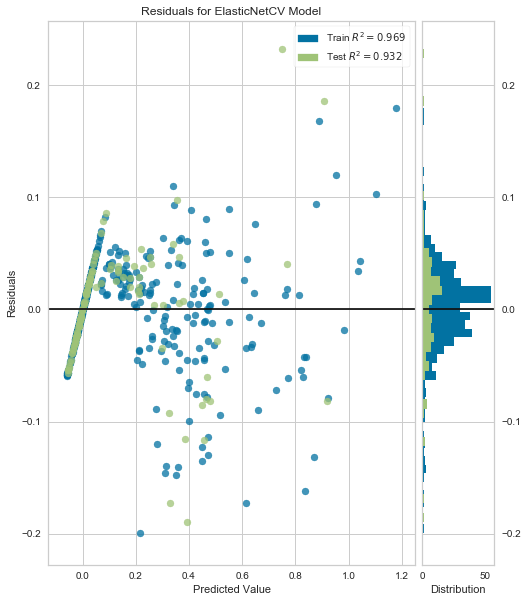

In [47]:
plt.figure(figsize=(8,10))
ResidPlot = ResidualsPlot(Elastic)

ResidPlot.fit(X_train, y_train)  # Fit the training data to the visualizer
ResidPlot.score(X_test, y_test)  # Evaluate the model on the test data
ResidPlot.show() 

## ElasticNet Regression: Residuals

In [48]:
print("ElasticNet Residuals:")
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
with pd.option_context("display.max_rows", 100):
    display(dfElastic)

ElasticNet Residuals:


,Actual,Predicted
0,0.57143,0.45526
1,0.00000,0.01385
2,0.00000,0.01431
3,0.00000,0.01383
4,0.00000,0.02109
...,...,...
115,0.26316,0.26752
116,0.72727,0.76740
117,0.06667,0.10623
118,0.00000,0.04024


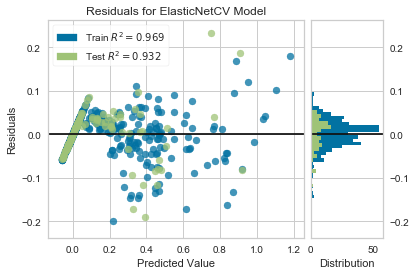

In [49]:
ResidPlot = ResidualsPlot(Elastic)
ResidPlot.fit(X_train, y_train)  # Fit the training data to the visualizer
ResidPlot.score(X_test, y_test)  # Evaluate the model on the test data
ResidPlot.show() 

## ElasticNet Regression: Scores

In [50]:
scores = pd.DataFrame([r2_score(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))], index=['R2 Score', 'Mean Squared Error', 'Root Mean Squared Error'])
scores.rename({0:'Scores'}, axis='columns')

,Scores
R2 Score,0.93201
Mean Squared Error,0.00280
Root Mean Squared Error,0.05295


# LOL Model: Predicting Zero for Everything

In [53]:
for i in range(len(y_pred)):
    y_pred[i]= 0;
print (y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [54]:
scores = pd.DataFrame([r2_score(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))], index=['R2 Score', 'Mean Squared Error', 'Root Mean Squared Error'])
scores.rename({0:'Scores'}, axis='columns')

,Scores
R2 Score,-0.33333
Mean Squared Error,0.05497
Root Mean Squared Error,0.23447
